In [1]:
import re
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open("input.txt", "r") as infile: 
    contents = infile.read().strip().split("\n")
contents[0:2]

['position=<-10166, -20343> velocity=< 1,  2>',
 'position=< 10430,  20752> velocity=<-1, -2>']

In [3]:
pattern = re.compile(r'position=<\s*(-?\d+),\s*(-?\d+)>\s*velocity=<\s*(-?\d+),\s*(-?\d+)>')

stars = list()
for line in contents: 
    match = re.search(pattern, line)
    if not match: 
        raise ValueError("There was a problem parsing '{}'".format(line))
    stars.append((tuple(int(x) for x in match.groups())))

stars[0:2]

[(-10166, -20343, 1, 2), (10430, 20752, -1, -2)]

In [4]:
def position(star, at=0):
    """get the position of the star at a moment in time from now"""
    return (star[0] + at * star[2], star[1] + at * star[3], star[2], star[3])

In [5]:
def gravity(stars): 
    """get the center of gravity of all the stars, assuming equal weights"""
    x = sum([star[0] for star in stars])/len(stars)
    y = sum([star[1] for star in stars])/len(stars)
    return (x, y)

In [6]:
def dispersion(stars):
    """compute the vertical and horizontal dispersion of all the stars"""
    G = gravity(stars)
    x = math.sqrt(sum([(star[0] - G[0])**2 for star in stars])/len(stars))
    y = math.sqrt(sum([(star[1] - G[1])**2 for star in stars])/len(stars))
    return x, y

In [7]:
def find(stars):
    """identify the moment when the dispersion is the lowest"""
    previous = None
    for i in range(60*60*24): #a day
        if i == 0:
            previous = dispersion([position(star, i) for star in stars])
            continue
        current = dispersion([position(star, i) for star in stars])
        if current > previous: 
            return i-1, [position(star, i-1) for star in stars]
        previous = current
    raise RuntimeError("Unable to find the minimum")

time, stars = find(stars)
time

10274

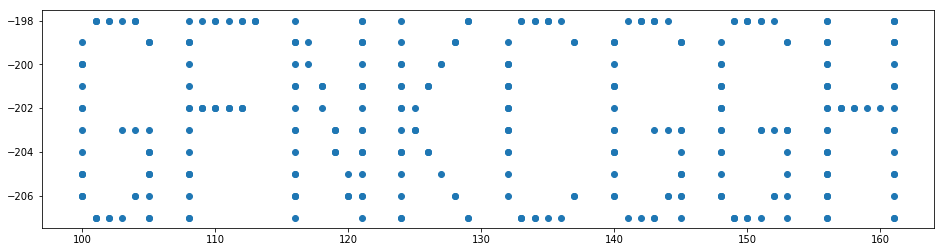

In [8]:
plt.figure(figsize=(16,4))
plt.scatter([s[0] for s in stars], [-s[1] for s in stars])
plt.show()